In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

pd.options.display.max_columns=1000
sns.set_theme()

In [2]:
df_users = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/relax_challenge/takehome_users.csv')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_engagement = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/relax_challenge/takehome_user_engagement.csv')
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df_users.shape

(12000, 10)

In [5]:
df_engagement.shape

(207917, 3)

In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

In [9]:
df_users = df_users.rename(columns={'object_id':'user_id'})
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
# Missing values
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].fillna(df_users['creation_time'])
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [11]:
df_engagement['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [12]:
df_engagement['time_stamp'].min()

Timestamp('2012-05-31 08:20:06')

In [13]:
df_engagement['time_stamp'].max()

Timestamp('2014-06-06 14:58:50')

In [14]:
df_engagement['user_id'].nunique()

8823

In [15]:
# I need to create a column that indicates if a user has visited in the past 7 day rolling window
# define a function to calculate the window
def window(df, freq, column, base):
    return df.rolling(freq, on=column)[base].count()
# apply function to df
df_engagement['7D_rolling'] = df_engagement.groupby('user_id', as_index=False, group_keys=False).apply(window, freq='7D', column='time_stamp', base='visited')
df_engagement

,time_stamp,user_id,visited,7D_rolling
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0


In [16]:
df_adopted_user = df_engagement.loc[(df_engagement['7D_rolling'] >= 3)]

In [17]:
df_adopted_user.shape

(160522, 4)

In [18]:
df_adopted_user.head()

,time_stamp,user_id,visited,7D_rolling
9,2014-02-09 03:45:04,2,1,3.0
10,2014-02-13 03:45:04,2,1,3.0
27,2013-02-19 22:08:03,10,1,3.0
30,2013-03-02 22:08:03,10,1,3.0
31,2013-03-05 22:08:03,10,1,3.0


In [19]:
df_adopted_user = df_adopted_user.drop_duplicates('user_id', keep = 'first')

In [20]:
df_adopted_user.shape

(1602, 4)

In [21]:
df_adopted_user.head()

,time_stamp,user_id,visited,7D_rolling
9,2014-02-09 03:45:04,2,1,3.0
27,2013-02-19 22:08:03,10,1,3.0
312,2014-03-13 11:46:38,20,1,3.0
331,2014-03-23 06:29:09,33,1,3.0
354,2012-12-26 19:05:07,42,1,3.0


In [22]:
# I can take the user_id s data from df_adopted_user and put it in a list and compare user_id s to the df_users dataset. 
# This will return a True or False column of which users have logged in 3 or more times within the window,
# which I can then run get_dummies on.

adopted_user_id = df_adopted_user['user_id'].tolist()
df_users['adopted_user'] = df_users['user_id'].isin(adopted_user_id)
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(4), o

In [24]:
df_users['creation_source'].nunique()

5

In [25]:
# I can break some of these categorical features up and make them numerical. 
# For example, the email domain and the creation source, and the adopted_user

df_users['email_domain'] = [x.split('@')[1] for x in df_users['email']]
df_users['email_domain'].nunique()

1184

In [26]:
df0 = df_users['email_domain'].value_counts().sort_values()
df0.value_counts()

1       1170
2          8
2447       1
1165       1
1179       1
1202       1
1259       1
3562       1
Name: email_domain, dtype: int64

In [27]:
# I will use the top 6 email domains and lump the remaining under 'other'
domains = df_users['email_domain'].value_counts().index[:6]

df_users['email_domain'] = [x if x in domains else 'other' for x in df_users['email_domain']]
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,yahoo.com


In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  bool          
 11  email_domain                12000 non-null  object    

In [29]:
df_users = pd.get_dummies(df_users, columns=['creation_source'])
df_users = pd.get_dummies(df_users, columns=['adopted_user'])
df_users = pd.get_dummies(df_users, columns=['email_domain'])
df_users

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user_False,adopted_user_True,email_domain_cuvox.de,email_domain_gmail.com,email_domain_gustr.com,email_domain_hotmail.com,email_domain_jourrapide.com,email_domain_other,email_domain_yahoo.com
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,2013-09-06 06:14:15,0,0,89,8263.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,2013-01-15 18:28:37,0,0,200,0.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,2014-04-27 12:45:16,1,1,83,8074.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,2012-06-02 11:55:59,0,0,6,0.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [30]:
df_users = df_users.drop('adopted_user_False', axis=1)
df_users.head()

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user_True,email_domain_cuvox.de,email_domain_gmail.com,email_domain_gustr.com,email_domain_hotmail.com,email_domain_jourrapide.com,email_domain_other,email_domain_yahoo.com
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
df_users.head(3)

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user_True,email_domain_cuvox.de,email_domain_gmail.com,email_domain_gustr.com,email_domain_hotmail.com,email_domain_jourrapide.com,email_domain_other,email_domain_yahoo.com
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [32]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   user_id                             12000 non-null  int64         
 1   creation_time                       12000 non-null  datetime64[ns]
 2   name                                12000 non-null  object        
 3   email                               12000 non-null  object        
 4   last_session_creation_time          12000 non-null  datetime64[ns]
 5   opted_in_to_mailing_list            12000 non-null  int64         
 6   enabled_for_marketing_drip          12000 non-null  int64         
 7   org_id                              12000 non-null  int64         
 8   invited_by_user_id                  12000 non-null  float64       
 9   creation_source_GUEST_INVITE        12000 non-null  uint8         
 10  creation_source_ORG_IN

In [33]:
df_users['user_id'].nunique()

12000

In [34]:
df_users = df_users.set_index('user_id')
df_users.head()

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,adopted_user_True,email_domain_cuvox.de,email_domain_gmail.com,email_domain_gustr.com,email_domain_hotmail.com,email_domain_jourrapide.com,email_domain_other,email_domain_yahoo.com
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
df_users = df_users.rename(columns={'creation_source_GUEST_INVITE':'guest_invite', 
                                    'creation_source_ORG_INVITE':'org_invite', 
                                    'creation_source_PERSONAL_PROJECTS':'personal_projects', 
                                    'creation_source_SIGNUP':'signup', 
                                    'creation_source_SIGNUP_GOOGLE_AUTH':'signup_google_auth',
                                    'adopted_user_True':'adopted_user',
                                    'email_domain_cuvox.de':'cuvox.de',
                                    'email_domain_gmail.com':'gmail.com',
                                    'email_domain_gustr.com':'gustr.com',
                                    'email_domain_hotmail.com':'hotmail.com',
                                    'email_domain_jourrapide.com':'jourrapide.com',
                                    'email_domain_other':'other_email_domain',
                                    'email_domain_yahoo.com':'yahoo.com'})
df_users.head(3)

,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,guest_invite,org_invite,personal_projects,signup,signup_google_auth,adopted_user,cuvox.de,gmail.com,gustr.com,hotmail.com,jourrapide.com,other_email_domain,yahoo.com
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [36]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   last_session_creation_time  12000 non-null  datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          12000 non-null  float64       
 8   guest_invite                12000 non-null  uint8         
 9   org_invite                  12000 non-null  uint8         
 10  personal_projects           12000 non-null  uint8         
 11  signup                      12000 non-null  uint8     

In [37]:
# I will now run random forest classifier and use it's .feature_importance_ property to determine which features are 
# most important for determining future adopted users.
target_names = 'creation_time name email last_session_creation_time adopted_user'.split()
target_names

['creation_time',
 'name',
 'email',
 'last_session_creation_time',
 'adopted_user']

In [38]:
fn = list()
hyper_table = list()

In [39]:
for i, name in enumerate(df_users.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [40]:
X = df_users[fn]
y = df_users['adopted_user']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [42]:
print(X_train.columns, X_train.shape[0])
print(X_test.columns, X_test.shape[0])

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'guest_invite', 'org_invite', 'personal_projects',
       'signup', 'signup_google_auth', 'cuvox.de', 'gmail.com', 'gustr.com',
       'hotmail.com', 'jourrapide.com', 'other_email_domain', 'yahoo.com'],
      dtype='object') 9600
Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'guest_invite', 'org_invite', 'personal_projects',
       'signup', 'signup_google_auth', 'cuvox.de', 'gmail.com', 'gustr.com',
       'hotmail.com', 'jourrapide.com', 'other_email_domain', 'yahoo.com'],
      dtype='object') 2400


In [43]:
model_rf = RandomForestClassifier(n_estimators=200, random_state = 1, n_jobs=-1, class_weight='balanced')
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=1)

In [44]:
y_pred = model_rf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [45]:
hyper_table.append(dict(accuracy=accuracy,
                        precision=precision,
                        recall=recall,
                        f1_score=f1))

In [46]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table

,accuracy,precision,recall,f1_score
0,0.802917,0.162679,0.10241,0.125693


16


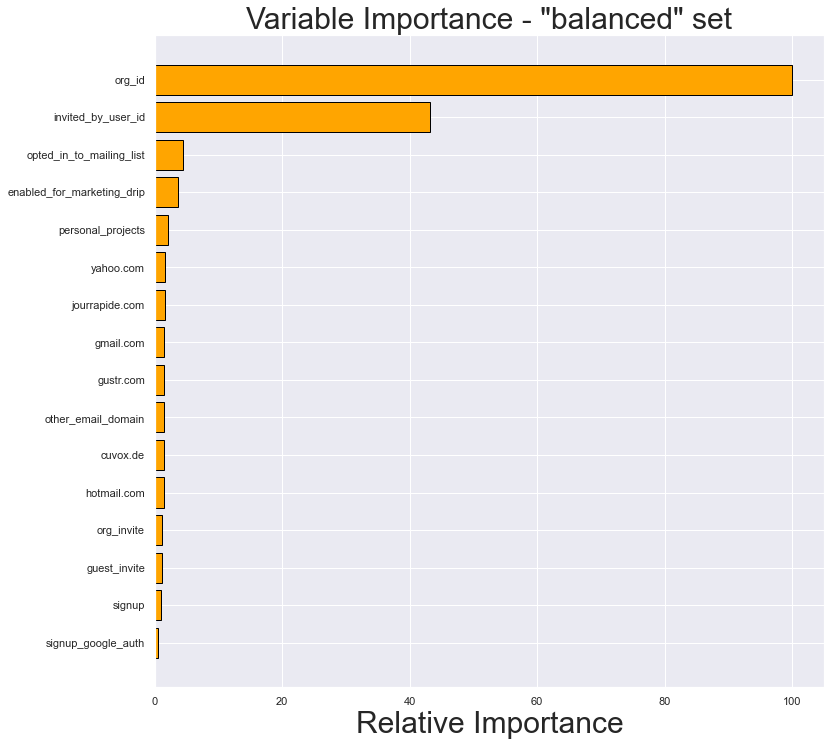

In [47]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df_users[fn].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - "balanced" set', fontsize=30)
plt.grid(True)
plt.show()

It appears as though there are 2-4 features that are important to predicting future adopted users. They are:

org_id: the organization (group of users) they belong to
invited_by_user_id: which user invited them to join (if applicable)
opted_in_to_mailing_list: whether they have opted into receiving marketing emails
enabled_for_marketing_drip: whether they are on the regular marketing email drip